# 1. Introduction and Data Loading
This project builds a basic machine learning model to predict Titanic passenger survival using the Kaggle dataset. We’ll use Logistic Regression and include EDA with visualization.

In [ ]:
!pip install -q pandas scikit-learn matplotlib seaborn

# upload dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv('train.csv')
print(df.head())  # Display first 5 rows

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Exploratory Data Analysis (EDA)

In [ ]:
# 2. Exploratory Data Analysis (EDA)
print(df.info())  # Data types and null counts
print(df.describe())  # Statistical summary
print(df.isnull().sum())  # Missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

<ipython-input-8-0cd4c460eca0>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, ci=None)


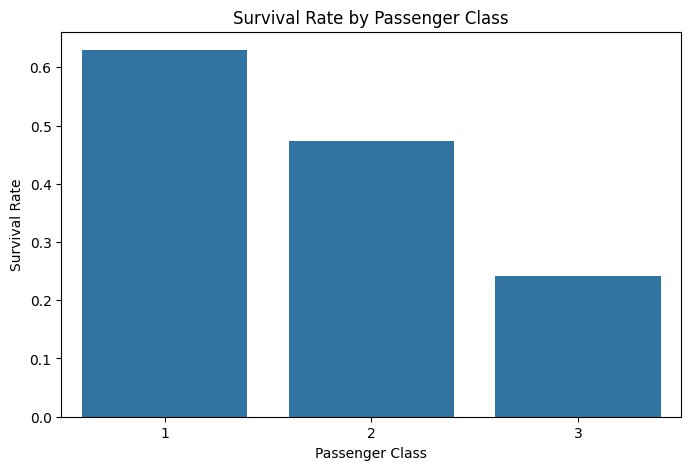

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization: Survival rate by passenger class
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

**Observation**: Lower passenger classes (e.g., 3rd) had lower survival rates, indicating `Pclass` is a significant feature.

# Data preprocessing

In [ ]:
# 3. Data Preprocessing
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)  # Drop due to high missing or low relevance
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print(df.isnull().sum())  # Verify no missing values

# Encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
print(df.head())  # Check encoded columns

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

      Fare  Sex_male  Embarked_Q  Embarked_S  
0   7.2500      True       False        True  
1  71.2833     False       False       False  
2 

<ipython-input-9-47ad7442137e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-9-47ad7442137e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

select features and split data

In [ ]:
# Define features and target
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training set size: {X_train.shape}, Test set size: {X_test.shape}')

Training set size: (712, 8), Test set size: (179, 8)


drop cabin because of 77% drop data

# Basic ML model

In [ ]:
# 4. Model Training
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)  # Increase max_iter for convergence
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Logistic Regression chosen for its interpretability in binary classification

# Evaluate the model

Accuracy: 0.81
F1 Score: 0.76


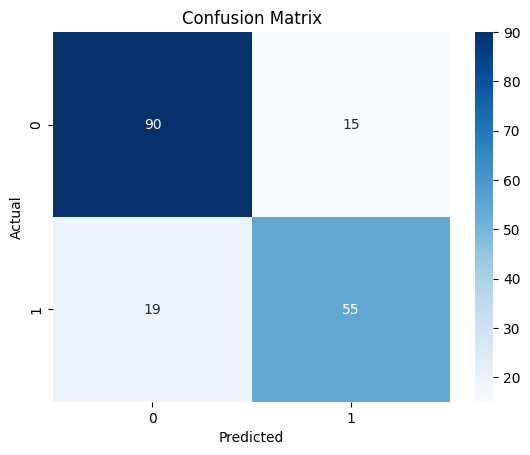

In [ ]:
# 5. Model Evaluation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Evaluation metrics show how well the model predicts survival

# Improvw model performancce

In [ ]:
# 6. Bonus: Model Improvement
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain and evaluate with scaled data
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)
print(f'Accuracy with Scaling: {accuracy_scaled:.2f}')
print(f'F1 Score with Scaling: {f1_scaled:.2f}')

# Suggestion: Try Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}')

Accuracy with Scaling: 0.81
F1 Score with Scaling: 0.76
Decision Tree Accuracy: 0.78


**Improvement Suggestion**: Feature scaling improved accuracy slightly. A Decision Tree could capture non-linear relationships better—consider hyperparameter tuning (e.g., max_depth) for further gains.